<div class="alert alert-block alert-info">
<b>Data Content</b>
</div>

- [<span style="font-weight: bold; font-family:Verdana; font-size:16px; color:#3F5075; ">Python Libraries</span>](#1)
- [<span style="font-weight: bold; font-family:Verdana; font-size:16px; color:#3F5075; ">Information About Data</span>](#2)
- [<span style="font-weight: bold; font-family:Verdana; font-size:16px; color:#3F5075; ">Cleaning Data</span>](#3)
- [<span style="font-weight: bold; font-family:Verdana; font-size:16px; color:#3F5075; ">Visualization Data</span>](#4)

<a id='1'></a>
## Python Libraries

In [359]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

<a id='2'></a>
## Information About Data

In [2]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
size = df.size
shape = df.shape
print(
    f'the size of data is {size} and the rows is {shape[0]} and col is {shape[1]}'
)

the size of data is 140933 and the rows is 10841 and col is 13


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

<a id='3'><a/>
## Cleaning Data

### Reviews col

In [7]:
df.Reviews.astype(int)  # Error Because the row 10472 is string

ValueError: invalid literal for int() with base 10: '3.0M'

In [8]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [9]:
df.drop(df.index[10472], inplace=True)

In [10]:
df['Reviews'] = df.Reviews.astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.1+ MB


### Size col

In [12]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [13]:
df.Size = df.Size.str.replace('M', '')
df.Size = df.Size.str.replace('k', '')
df.Size = df.Size.replace('Varies with device', np.nan)

In [14]:
df.Size.unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '2.7', '5.5', '17', '39', '31', '4.2',
       '7.0', '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24', nan,
       '9.4', '15', '10', '1.2', '26', '8.0', '7.9', '56', '57', '35',
       '54', '201', '3.6', '5.7', '8.6', '2.4', '27', '2.5', '16', '3.4',
       '8.9', '3.9', '2.9', '38', '32', '5.4', '18', '1.1', '2.2', '4.5',
       '9.8', '52', '9.0', '6.7', '30', '2.6', '7.1', '3.7', '22', '7.4',
       '6.4', '3.2', '8.2', '9.9', '4.9', '9.5', '5.0', '5.9', '13', '73',
       '6.8', '3.5', '4.0', '2.3', '7.2', '2.1', '42', '7.3', '9.1', '55',
       '6.5', '1.5', '7.5', '51', '41', '48', '8.5', '46', '8.3', '4.3',
       '4.7', '3.3', '40', '7.8', '8.8', '6.6', '5.1', '61', '66', '79',
       '8.4', '118', '44', '695', '1.6', '6.2', '53', '1.4', '3.0', '5.8',
       '3.8', '9.6', '45', '63', '49', '77', '4.4', '4.8', '70', '6.9',
       '9.3', '10.0', '8.1', '36', '84', '97', '2.0

In [15]:
df.Size = df.Size.astype(float)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int32(1), object(10)
memory usage: 1.1+ MB


### Installs col

In [17]:
df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [18]:
df.Installs = df['Installs'].str.replace('+', '')
df.Installs = df['Installs'].str.replace(',', '')
df.Installs = df['Installs'].astype(int)

In [19]:
df.Installs.head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int32

### Price col

In [20]:
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [21]:
df['Price'] = df.Price.str.replace('$', '')

In [22]:
df['Price'] = df.Price.astype(float)

In [23]:
df.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1.1+ MB


### Last Updated

In [25]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [26]:
df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [27]:
df['Month'] = df['Last Updated'].dt.month
df['Year'] = df['Last Updated'].dt.year

In [28]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,6,2018


In [29]:
df.drop(columns='Last Updated', inplace=True)

In [30]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,6,2018


In [31]:
def fill(data):
    return data.fillna(data.median())

In [32]:
df['Rating'] = df['Rating'].transform(fill)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Month           10840 non-null  int64  
 13  Year            10840 non-null  int64  
dtypes: float64(3), int32(2), int64(2), object(7)
memory usage: 1.2+ MB


In [34]:
df.isna().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Current Ver          8
Android Ver          2
Month                0
Year                 0
dtype: int64

In [35]:
df.Type.unique()

array(['Free', 'Paid', nan], dtype=object)

In [36]:
df.Type.mode()

0    Free
Name: Type, dtype: object

In [37]:
df.Type.mode().values[0]

'Free'

In [38]:
df.Type.fillna(df.Type.mode().values[0], inplace=True)

In [39]:
df.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [40]:
df['Size'] = df.Size.transform(fill)

In [41]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Current Ver       8
Android Ver       2
Month             0
Year              0
dtype: int64

In [42]:
df.duplicated().sum()

484

In [43]:
df.drop_duplicates(inplace=True)

## Visualization Data
<a id='4'></a>

### App col

In [44]:
df.App.value_counts()

ROBLOX                                           9
8 Ball Pool                                      7
Bubble Shooter                                   6
Helix Jump                                       6
Zombie Catchers                                  6
                                                ..
Popsicle Launcher for Android P 9.0 launcher     1
PixelLab - Text on pictures                      1
P Launcher for Android™ 9.0                      1
Pacify (Android P theme) - Theme for Xperia™     1
iHoroscope - 2018 Daily Horoscope & Astrology    1
Name: App, Length: 9659, dtype: int64

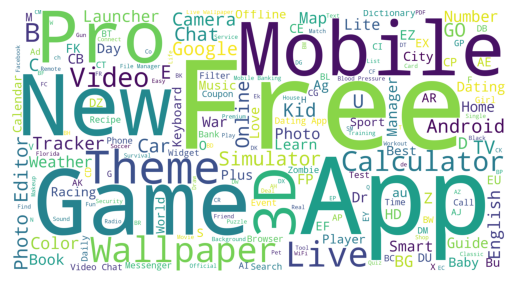

In [45]:
wordcloud = WordCloud(width=1900,
                      height=1000,
                      stopwords=STOPWORDS,
                      background_color='white').generate(" ".join(df['App']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Category col

In [46]:
df['Category'].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   842
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

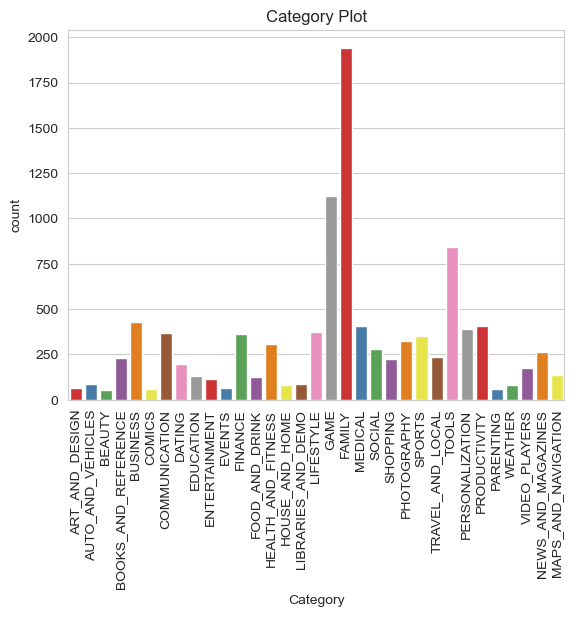

In [47]:
sns.countplot(data=df, x='Category', palette='Set1')
plt.rcParams['figure.figsize'] = (10, 8)
plt.xticks(rotation=90)
plt.title("Category Plot")
plt.show()

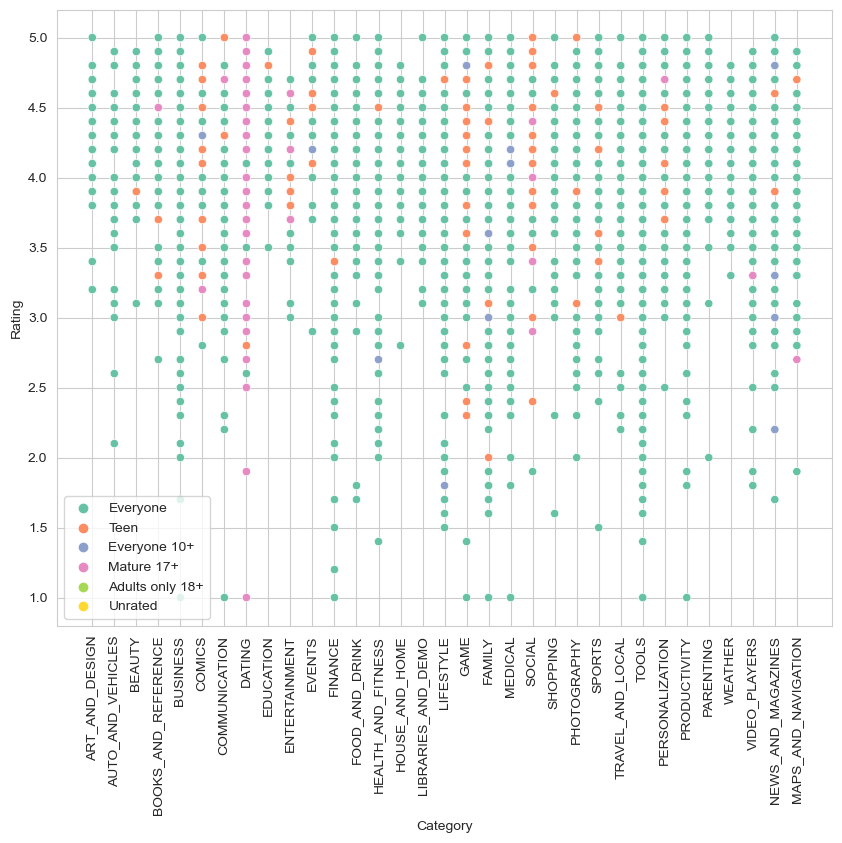

In [48]:
sns.scatterplot(data=df, x='Category', y='Rating',hue='Content Rating',palette='Set2')
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.show()

### Rating col

In [49]:
Rating_High=df[df['Rating']>=4.5]

In [50]:
Rating_High['App'].value_counts()

ROBLOX                                              9
8 Ball Pool                                         7
Zombie Catchers                                     6
Bubble Shooter                                      5
Duolingo: Learn Languages Free                      5
                                                   ..
Podcast Addict                                      1
Podcast Republic - Podcast Player & Radio Player    1
Spreaker Podcast Radio                              1
The Washington Post Classic                         1
iHoroscope - 2018 Daily Horoscope & Astrology       1
Name: App, Length: 2551, dtype: int64

In [51]:
order=Rating_High['App'].value_counts()[0:8].index
order

Index(['ROBLOX', '8 Ball Pool', 'Zombie Catchers', 'Bubble Shooter',
       'Duolingo: Learn Languages Free', 'Bowmasters', 'Subway Surfers',
       'Granny'],
      dtype='object')

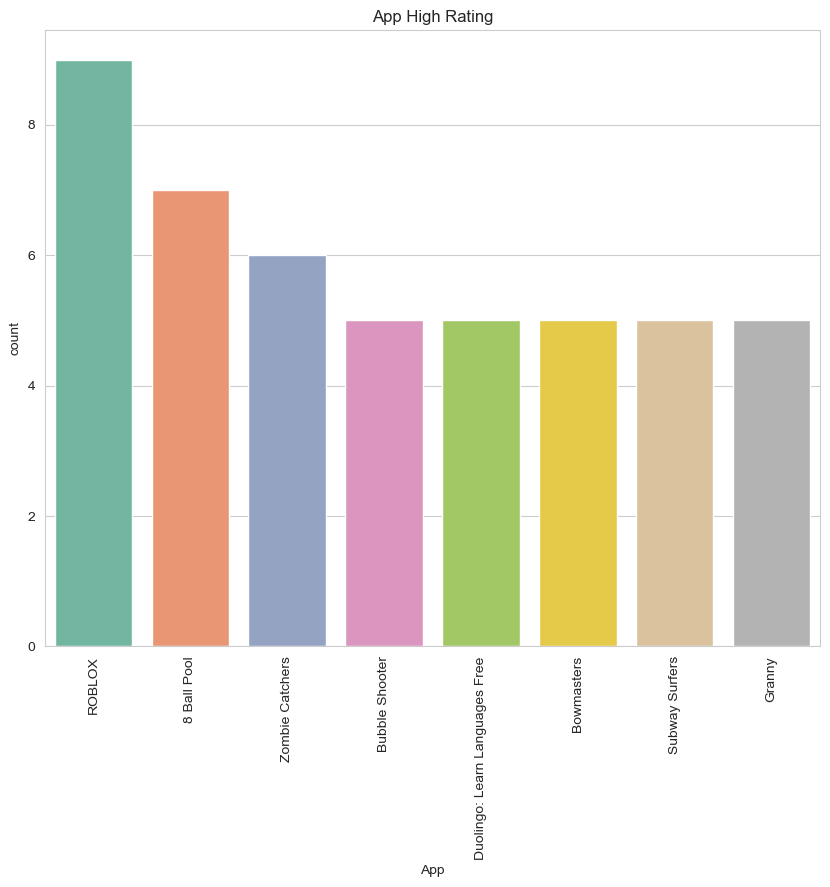

In [52]:
sns.countplot(data=Rating_High, x='App', order=order, palette='Set2')
plt.xticks(rotation=90)
plt.title("App High Rating")
plt.show()

In [153]:
data = go.Box(
    x=df['Content Rating'],
    y=df['Rating'],
    marker_color='mediumorchid',
)
layout = go.Layout(height=800,
                   width=1200,
                   title={
                       'text': "Distribution Of Content Rating",
                       'x': 0.4,
                       'y': 0.93,
                       'xanchor': 'center',
                       'yanchor': 'top'
                   },
                   xaxis={'title': 'Content Rating'},
                   yaxis=dict(title='Rating'),
                   template='simple_white')
fig = go.Figure(data=data, layout=layout)
fig.show()

### Type

In [55]:
df['Type'].value_counts()

Free    9591
Paid     765
Name: Type, dtype: int64

In [74]:
data = go.Pie(
    labels=['Free', 'Paid'],
    values=df['Type'].value_counts(),
    hoverinfo='label+value',
    textinfo='label+percent',
)
layout = go.Layout(width=900,
                   height=600,
                   title={
                       'text': 'Distribution of Types',
                       'x': 0.5,
                       'y': 0.95,
                       'xanchor': 'center',
                       'yanchor': 'top',
                       'font': {
                           'family': 'Arial',
                           'size': 30,
                       }
                   })
fig = go.Figure(data=data, layout=layout)
fig.show()

In [156]:
data = go.Box(x=df['Type'], y=df['Rating'], marker_color='cadetblue')
layout = go.Layout(height=600,
                   width=900,
                   title={
                       'text': "Type With Rating",
                       'x': 0.4,
                       'y': 0.93,
                       'xanchor': 'center',
                       'yanchor': 'top'
                   },
                   xaxis=dict(title="Type"),
                   yaxis=dict(title='Rating'),
                   template='plotly_white')
fig = go.Figure(data=data, layout=layout)
fig.show()

### Content Rating col

In [59]:
content=df['Content Rating'].value_counts().index
content

Index(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+', 'Adults only 18+',
       'Unrated'],
      dtype='object')

In [73]:
data = go.Pie(
    labels=content,
    values=df['Content Rating'].value_counts(),
    hoverinfo='label+value',
    textinfo='label+percent',
)
layout = go.Layout(width=900,
                   height=600,
                   title={
                       'text': 'Distribution of Content Rating',
                       'x': 0.5,
                       'y': 0.95,
                       'xanchor': 'center',
                       'yanchor': 'top'
                   })
fig = go.Figure(data=data, layout=layout)
fig.show()

### Genres col

In [166]:
x=df['Genres'].value_counts()
x

Tools                                841
Entertainment                        588
Education                            527
Business                             427
Medical                              408
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Lifestyle;Pretend Play                 1
Tools;Education                        1
Strategy;Creativity                    1
Name: Genres, Length: 119, dtype: int64

In [219]:
data = go.Bar(x=x[0:6].index, y=x.values, marker=dict(color='#D68776'))
layout = go.Layout(width=900,
                   height=600,
                   title={
                       'text': 'Distribution Of Genres',
                       'x': 0.5,
                       'y': 0.85,
                       'xanchor': 'center',
                       'yanchor': 'top'
                   },
                   xaxis=dict(title='Genres'),
                   yaxis=dict(title='Count'),
                   template='plotly_white')
fig = go.Figure(data=data, layout=layout)
fig.show()

### Month col

In [223]:
df['Year'].unique()

array([2018, 2017, 2014, 2016, 2015, 2013, 2012, 2011, 2010], dtype=int64)

In [224]:
df['Month'].unique()

array([ 1,  8,  6,  3,  4,  9,  7, 10, 11,  5, 12,  2], dtype=int64)

In [324]:
data = [
    go.Scatter3d(x=x.index,
                 y=df['Month'],
                 z=df['Rating'],
                 mode='markers',
                 marker=dict(color='darkviolet', opacity=0.7))
]
layout = go.Layout(width=900,
                   height=600,
                   title={
                       'text': 'Distribution Of 3D Scatter',
                       'x': 0.5,
                       'y': 0.9,
                       'xanchor': 'center',
                       'yanchor': 'top'
                   },
                   scene=dict(xaxis=dict(title='Genres'),
                              yaxis=dict(title='Month'),
                              zaxis=dict(title='Rating')),
                   template='plotly_white')
fig = go.Figure(data=data, layout=layout)
fig.show()